In [6]:
import numpy as np
import librosa
import librosa.display
import scipy
import matplotlib.pyplot as plt
import sklearn
import soundfile as sf
import mir_eval

Test n_fft

In [7]:
song_name = 'yoasobi_short'
sr = 44100
y, _ = librosa.load(f'/Users/chenyutsai/Downloads/{song_name}.wav', sr)

for n_fft in [4096, 2048, 1024]:
    x, phase = librosa.magphase(librosa.stft(y, n_fft=n_fft, hop_length=256, center=False, win_length=1024))    
    x_bg = cal_mask(x)
    # prevent x_bg to be larger than x
    x_bg = np.minimum(x, x_bg)
    x_vocal = x - x_bg
    power = 2
    mask_bg = librosa.util.softmask(x_bg,
                                   x_vocal,
                                   power=power)

    mask_vocal = librosa.util.softmask(x_vocal,
                                   x_bg,
                                   power=power)
    vocal = mask_vocal * x
    bg = mask_bg * x
    t = librosa.istft(vocal*phase, hop_length=256, center=False, win_length=1024)
    sf.write(f'/Users/chenyutsai/Downloads/{song_name}_vocal_{n_fft}.wav', t, sr)
    t = librosa.istft(bg*phase, hop_length=256, center=False, win_length=1024)
    sf.write(f'/Users/chenyutsai/Downloads/{song_name}_bg_{n_fft}.wav', t, sr)






KeyboardInterrupt: 

Test window_length

In [8]:
song_name = 'yoasobi_short'
sr = 44100
y, _ = librosa.load(f'/Users/chenyutsai/Downloads/{song_name}.wav', sr)

for win_len in [1024, 512, 256, 128 ]:
    x, phase = librosa.magphase(librosa.stft(y, n_fft=1024, hop_length=256, center=False, win_length=win_len))    
    x_bg = cal_mask(x)
    # prevent x_bg to be larger than x
    x_bg = np.minimum(x, x_bg)
    x_vocal = x - x_bg
    power = 2
    mask_bg = librosa.util.softmask(x_bg,
                                   x_vocal,
                                   power=power)

    mask_vocal = librosa.util.softmask(x_vocal,
                                   x_bg,
                                   power=power)
    vocal = mask_vocal * x
    bg = mask_bg * x
    t = librosa.istft(vocal*phase, hop_length=256, center=False, win_length=win_len)
    sf.write(f'/Users/chenyutsai/Downloads/{song_name}_vocal_w{win_len}.wav', t, sr)
    t = librosa.istft(bg*phase, hop_length=256, center=False, win_length=win_len)
    sf.write(f'/Users/chenyutsai/Downloads/{song_name}_bg_w{win_len}.wav', t, sr)
    
    x_bg, _ = librosa.load(f'yoasobi_short_music.mp3', sr)
    x_vocal, _ = librosa.load(f'yoasobi_short_vocals.mp3', sr)

#     estimated_baseline, _ = librosa.load(f'{inst_baseline}', sr)
    bg, _ = librosa.load(f'/Users/chenyutsai/Downloads/{song_name}_bg_w{win_len}.wav', sr)
    vocal, _ = librosa.load(f'/Users/chenyutsai/Downloads/{song_name}_vocal_w{win_len}.wav', sr)

#     print(len(estimated), len(y))
    x_bg = x_bg[:len(bg)]
    x_vocal = x_vocal[:len(vocal)]
    
#     estimated_baseline = estimated_baseline[:len(y)]
#     estimated_1024 = estimated_1024[:len(y)]
#     estimated_2048 = estimated_2048[:len(y)]
#     estimated_4096 = estimated_4096[:len(y)]
    
    # (refer, estimated)
#     sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_baseline)

#     print(f'baseline,{sdr},{sir},{sar}')
    sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(x_bg, bg)

    print(f'bg, {win_len}, {sdr},{sir},{sar}')
    
    sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(x_vocal, vocal)

    print(f'vocal, {win_len}, {sdr},{sir},{sar}')





/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


bg, 1024, [7.29389911],[inf],[7.29389911]
vocal, 1024, [4.40157086],[inf],[4.40157086]


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


bg, 512, [6.54968307],[inf],[6.54968307]
vocal, 512, [4.3415114],[inf],[4.3415114]


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


bg, 256, [-3.08531028],[inf],[-3.08531028]
vocal, 256, [-8.13331292],[inf],[-8.13331292]


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


bg, 128, [-6.60638748],[inf],[-6.60638748]
vocal, 128, [-15.06525736],[inf],[-15.06525736]


Functions for our algorithm

In [4]:
def sim_matrix(X):
    X = X / np.sqrt(np.sum(np.power(X, 2), axis=0))
    return np.matmul(X.T, X)


def get_sim_matrix(data, k=None, width=1, metric='euclidean',
                      sym=False, sparse=False, mode='connectivity',
                      bandwidth=None, axis=-1):

    data = np.atleast_2d(data)

    # Swap observations to the first dimension and flatten the rest
    data = np.swapaxes(data, axis, 0)
    t = data.shape[0]
    data = data.reshape((t, -1))

    if width < 1:
        raise ParameterError('width must be at least 1')

    if mode not in ['connectivity', 'distance', 'affinity']:
        raise ParameterError(("Invalid mode='{}'. Must be one of "
                              "['connectivity', 'distance', "
                              "'affinity']").format(mode))
    if k is None:
        if t > 2 * width + 1:
            k = 2 * np.ceil(np.sqrt(t - 2 * width + 1))
        else:
            k = 2

    if bandwidth is not None:
        if bandwidth <= 0:
            raise ParameterError('Invalid bandwidth={}. '
                                 'Must be strictly positive.'.format(bandwidth))

    k = int(k)

    # Build the neighbor search object
    try:
        knn = sklearn.neighbors.NearestNeighbors(n_neighbors=min(t-1, k + 2 * width),
                                                 metric=metric,
                                                 algorithm='auto')
    except ValueError:
        knn = sklearn.neighbors.NearestNeighbors(n_neighbors=min(t-1, k + 2 * width),
                                                 metric=metric,
                                                 algorithm='brute')

    knn.fit(data)

    # Get the knn graph
    if mode == 'affinity':
        kng_mode = 'distance'
    else:
        kng_mode = mode

    rec = knn.kneighbors_graph(mode=kng_mode).tolil()

    # Remove connections within width
    for diag in range(-width + 1, width):
        rec.setdiag(0, diag)

    # Retain only the top-k links per point
    for i in range(t):
        # Get the links from point i
        links = rec[i].nonzero()[1]

        # Order them ascending
        idx = links[np.argsort(rec[i, links].toarray())][0]

        # Everything past the kth closest gets squashed
        rec[i, idx[k:]] = 0

    # symmetrize
    if sym:
        rec = rec.minimum(rec.T)

    rec = rec.tocsr()
    rec.eliminate_zeros()

    if mode == 'connectivity':
        rec = rec.astype(np.bool)
    elif mode == 'affinity':
        if bandwidth is None:
            bandwidth = np.median(rec.max(axis=1).data)
        rec.data[:] = np.exp(- rec.data / bandwidth)

    if not sparse:
        rec = rec.toarray()

    return rec



def cal_mask(X, ttf=2):
    rec = librosa.segment.recurrence_matrix(X, axis=-1, width=int(librosa.time_to_frames(ttf, sr=sr)), metric='cosine',sparse=True)
#     rec = get_sim_matrix(X, width=int(librosa.time_to_frames(ttf, sr=sr)), metric='cosine', )
    rec = scipy.sparse.csc_matrix(rec)
    X = np.swapaxes(X, 0, -1)
    out = np.empty_like(X)

    for i in range(len(rec.indptr) - 1):

        targets = rec.indices[rec.indptr[i] : rec.indptr[i + 1]]

        if not len(targets):
            out[i] = X[i]
            continue

        neighbors = np.take(X, targets, axis=0)

        out[i] = np.median(neighbors, axis=0)

    return np.swapaxes(out, 0, -1)

In [27]:
x_bg = cal_mask(x)
# prevent x_bg to be larger than x
x_bg = np.minimum(x, x_bg)
x_vocal = x - x_bg

In [28]:
# here, we tried to generate the background and vocal by combining x_bg and x_vocal with some ratios.
# these ratios can be tuned to get better result
power = 2

mask_bg = librosa.util.softmask(x_bg,
                               x_vocal,
                               power=power)

mask_vocal = librosa.util.softmask(x_vocal,
                               x_bg,
                               power=power)
vocal = mask_vocal * x
bg = mask_bg * x

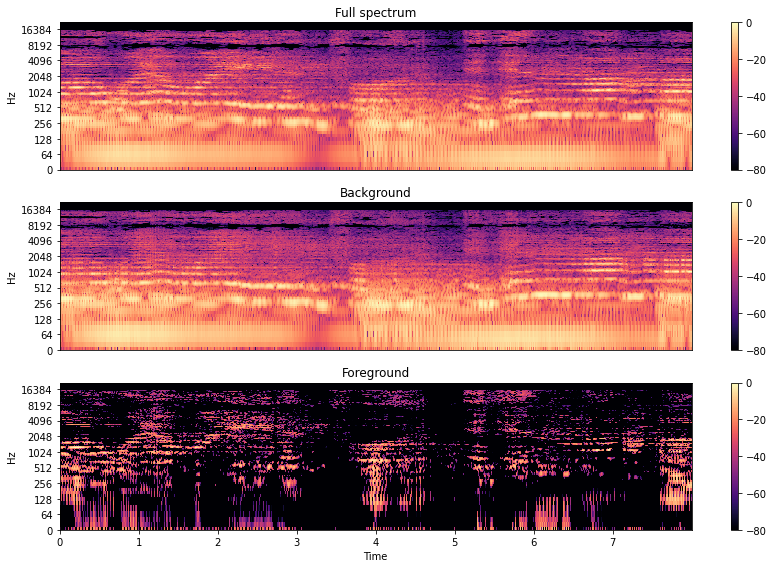

In [29]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(x[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(bg[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(vocal[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()

In [30]:
import soundfile as sf
t = librosa.istft(vocal*phase, hop_length=256, center=False, win_length=1024)
sf.write(f'/Users/chenyutsai/Downloads/{song_name}_vocal.wav', t, sr)
t = librosa.istft(bg*phase, hop_length=256, center=False, win_length=1024)
sf.write(f'/Users/chenyutsai/Downloads/{song_name}_bg.wav', t, sr)

In [22]:
import numpy as np
import librosa
import librosa.display
import scipy
import matplotlib.pyplot as plt
import sklearn
import soundfile as sf
import mir_eval

song_name = 'yoasobi'
postfix = [['_vocals.mp3', '_baseline_vocal.mp3', '_vocal.wav'], 
           ['_music.mp3', '_baseline_bg.mp3', '_bg.wav']]

for i in range(2):
    song = song_name+postfix[i][0]
    sr = 44100
    y, _ = librosa.load(f'{song}', sr)

    print(song)

    inst_baseline = song_name+postfix[i][1]
    inst_ours = song_name+postfix[i][2]
    
    estimated_baseline, _ = librosa.load(f'{inst_baseline}', sr)
    estimated_ours, _ = librosa.load(f'{inst_ours}', sr)

#     print(len(estimated), len(y))
    # y = y[:len(estimated)]
    estimated_baseline = estimated_baseline[:len(y)]
    estimated_ours = estimated_ours[:len(y)]
    # (refer, estimated)
    sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_baseline)

    print(f'baseline,{sdr},{sir},{sar}')
    sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_ours)

    print(f'ours,{sdr},{sir},{sar}')

/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


yoasobi_vocals.mp3


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


baseline,[-5.68760693],[inf],[-5.68760693]
ours,[1.75136843],[inf],[1.75136843]


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


yoasobi_music.mp3


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


baseline,[-3.00568676],[inf],[-3.00568676]
ours,[5.61789741],[inf],[5.61789741]


In [21]:
import numpy as np
import librosa
import librosa.display
import scipy
import matplotlib.pyplot as plt
import sklearn
import soundfile as sf
import mir_eval

song_name = 'faded'
postfix = [['_vocals.mp3', '_baseline_vocal.mp3', '_vocal.wav'], 
           ['_music.mp3', '_baseline_bg.mp3', '_bg.wav']]

for i in range(2):
    song = song_name+postfix[i][0]
    sr = 44100
    y, _ = librosa.load(f'{song}', sr)

    print(song)

    inst_baseline = song_name+postfix[i][1]
    inst_ours = song_name+postfix[i][2]
    
    estimated_baseline, _ = librosa.load(f'{inst_baseline}', sr)
    estimated_ours, _ = librosa.load(f'{inst_ours}', sr)

#     print(len(estimated), len(y))
    # y = y[:len(estimated)]
    estimated_baseline = estimated_baseline[:len(y)]
    estimated_ours = estimated_ours[:len(y)]
    # (refer, estimated)
    sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_baseline)

    print(f'baseline,{sdr},{sir},{sar}')
    sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_ours)

    print(f'ours,{sdr},{sir},{sar}')

/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


faded_vocals.mp3


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


baseline,[4.74688828],[inf],[4.74688828]
ours,[-2.30727587],[inf],[-2.30727587]


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


faded_music.mp3


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


baseline,[-1.23081391],[inf],[-1.23081391]
ours,[4.5932235],[inf],[4.5932235]


In [32]:
import numpy as np
import librosa
import librosa.display
import scipy
import matplotlib.pyplot as plt
import sklearn
import soundfile as sf
import mir_eval

song_name = 'gigi'
postfix = [['_vocals.mp3', '_baseline_vocal.mp3', '_vocal.wav'], 
           ['_music.mp3', '_baseline_bg.mp3', '_bg.wav']]

for i in range(2):
    song = song_name+postfix[i][0]
    sr = 44100
    y, _ = librosa.load(f'{song}', sr)

    print(song)

#     inst_baseline = song_name+postfix[i][1]
    inst_ours = song_name+postfix[i][2]
    
#     estimated_baseline, _ = librosa.load(f'{inst_baseline}', sr)
    estimated_ours, _ = librosa.load(f'{inst_ours}', sr)

#     print(len(estimated), len(y))
    # y = y[:len(estimated)]
#     estimated_baseline = estimated_baseline[:len(y)]
    estimated_ours = estimated_ours[:len(y)]
    # (refer, estimated)
#     sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_baseline)

#     print(f'baseline,{sdr},{sir},{sar}')
    sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_ours)

    print(f'ours,{sdr},{sir},{sar}')

/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


gigi_vocals.mp3
ours,[0.22907091],[inf],[0.22907091]


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


gigi_music.mp3
ours,[10.87036944],[inf],[10.87036944]


In [37]:
song_name = 'yoasobi_short'
postfix = [['_vocals.mp3', '_vocal_1024.wav', '_vocal_2048.wav', '_vocal_4096.wav'], 
           ['_music.mp3', '_bg_1024.wav', '_bg_2048.wav', '_bg_4096.wav']]

for i in range(2):
    song = song_name+postfix[i][0]
    sr = 44100
    y, _ = librosa.load(f'{song}', sr)

    print(song)

#     inst_baseline = song_name+postfix[i][1]
    inst_1024 = song_name+postfix[i][1]
    inst_2048 = song_name+postfix[i][2]
    inst_4096 = song_name+postfix[i][3]
#     estimated_baseline, _ = librosa.load(f'{inst_baseline}', sr)
    estimated_1024, _ = librosa.load(f'{inst_1024}', sr)
    estimated_2048, _ = librosa.load(f'{inst_2048}', sr)
    estimated_4096, _ = librosa.load(f'{inst_4096}', sr)

#     print(len(estimated), len(y))
    y = y[:len(estimated_1024)]
#     estimated_baseline = estimated_baseline[:len(y)]
#     estimated_1024 = estimated_1024[:len(y)]
#     estimated_2048 = estimated_2048[:len(y)]
#     estimated_4096 = estimated_4096[:len(y)]
    
    # (refer, estimated)
#     sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_baseline)

#     print(f'baseline,{sdr},{sir},{sar}')
    sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_1024)

    print(f'1024,{sdr},{sir},{sar}')
    
    sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_2048)

    print(f'2048,{sdr},{sir},{sar}')
    
    sdr, sir, sar, perm = mir_eval.separation.bss_eval_sources(y, estimated_4096)

    print(f'4096,{sdr},{sir},{sar}')

/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


yoasobi_short_vocals.mp3
1024,[4.40157086],[inf],[4.40157086]
2048,[4.41134573],[inf],[4.41134573]
4096,[4.41767444],[inf],[4.41767444]
yoasobi_short_music.mp3


/Users/chenyutsai/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1024,[7.29389911],[inf],[7.29389911]
2048,[7.25072901],[inf],[7.25072901]
4096,[7.23102068],[inf],[7.23102068]
